# EDA and Data Visualization

While a more robust dashboard will be built in Tableau, we want to continue exploring data while visualizing relationships between features here in Python

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# bringing back in data frames ff_all and ff_collective

starter_df = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_starters_by_year.csv", index_col = 0)
ff_tall = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_collective_filtered.csv", index_col = 0)

qb_wide = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_qb_wide.csv", index_col = 0)
rb_wide = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_rb_wide.csv", index_col = 0)
wr_wide = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_wr_wide.csv", index_col = 0)
te_wide = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_te_wide.csv", index_col = 0)

## DataFrame explanation

starter_df contains the players that ranked as in the top 12 as a QB or TE, top 24 as an RB and top 36 as a WR, with a row for each season and each player. 

ff_tall contains players that played in at least 6 games each season AND also scored in the top 50% of all players over all seasons (~33 points). The purpose for these two are for more holistic data analysis and visualization of fantasy.

Each position 'wide' (i.e. rb_wide) contains a row per player that contains their stats from 2019 - 2022. The purpose of this DF is to model off of it and utilize a players previous year's stats to predict how they will do the following season.

In [15]:
ff_tall.head()

,team,player_name,position,player_id_x,height,weight,years_exp,tm,pos,age,g,gs,tgt,rec,passingyds,passingtd,passingatt,rushingyds,rushingtd,rushingatt,receivingyds,receivingtd,fantasypoints,int,fumbles,fumbleslost,adp,name,season,cmp,ppr,dkpt,fdpt,vbd,team_abb,player_id_y,qbr_total,pts_added,qb_plays,epa_total,pass,run,exp_sack,qbr_raw,sack,name_display,player_display_name,player_gsis_id_x,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness,max_completed_air_distance,avg_air_yards_to_sticks,attempts,pass_yards,pass_touchdowns,interceptions,passer_rating,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,player_gsis_id_y,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,expected_rush_yards,rush_yards_over_expected,rush_yards_over_expected_per_att,rush_pct_over_expected,player_gsis_id,avg_cushion,avg_separation,percent_share_of_intended_air_yards,catch_percentage,avg_yac,avg_expected_yac,avg_yac_above_expectation,team.1,pts_scored,1std,totyd,passy,rushy,to,offense,defense,pts_allowed,yds_alowed,passyds_allowed,rushyds_allowed,team_takeaways,sp. tms,losses,ties,wins,team_wins,abbreviation,pct_gs,avg_per_rush,avg_per_catch,avg_per_tgt,ttl_touch,ttl_opp,ttl_turnover,ttl_opp_per_game,yds_per_opp,td_per_opp,turnover_per_opp,fp_per_opp,fp_per_gm,rookie,scrimyds,non_pass_tds,std_fp,std_fp_5ptd,hppr_fp,hppr_fp_5ptd,te_prem_pts,te_prem_pts_p5td,hppr_pts_pg_5ptd,te_prem_pts_pg_5ptd,season_position_rank,ff_level
1,ARI,Kyler Murray,QB,00-0035228,70.0,207.0,0.0,ARI,QB,22.0,16.0,16.0,0.0,0.0,3722.0,20.0,542.0,544.0,4.0,93.0,0.0,0.0,279.28,12.0,5.0,2.0,114.0,Kyler Murray,2019,NaN,NaN,NaN,NaN,NaN,ARI,3917315.0,57.7,16.2,709.0,71.6,37.3,13.4,0.0,58.0,-17.8,Kyler Murray,Kyler Murray,00-0035228,2.733681,4.914236,6.850385,-1.936149,13.732432,38.64734,-2.111357,63.764706,437.882353,2.352941,1.411765,88.714455,66.836301,-1.817664,20.623331,45.849949,00-0035228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arizona Cardinals,361.0,314.0,5467.0,3477.0,1990.0,18.0,64.36,-173.55,442.0,6432.0,4510.0,1922.0,17.0,19.85,10.0,1.0,5.0,5.5,ARI,1.000000,5.849462,NaN,NaN,93.0,635.0,14.0,39.687500,6.718110,0.037795,0.022047,0.439811,17.455000,1,544.0,4.0,279.28,299.28,279.28,299.28,279.28,299.28,18.705000,18.705000,8.0,1
4,ARI,David Johnson,RB,00-0032187,73.0,224.0,4.0,ARI,RB,28.0,13.0,9.0,47.0,36.0,0.0,0.0,0.0,345.0,2.0,94.0,370.0,4.0,141.50,0.0,1.0,1.0,5.0,David Johnson,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,David Johnson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.014747,7.957232,2.842629,123.646390,-19.479724,-0.662145,0.280077,00-0032187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arizona Cardinals,361.0,314.0,5467.0,3477.0,1990.0,18.0,64.36,-173.55,442.0,6432.0,4510.0,1922.0,17.0,19.85,10.0,1.0,5.0,5.5,ARI,0.692308,3.670213,10.277778,7.872340,130.0,141.0,1.0,10.846154,5.070922,0.042553,0.007092,1.003546,10.884615,0,715.0,6.0,105.50,105.50,123.50,123.50,123.50,123.50,9.500000,9.500000,38.0,Non-starter
5,ARI,Kenyan Drake,RB,00-0033118,73.0,211.0,3.0,2TM,RB,25.0,14.0,10.0,68.0,50.0,0.0,0.0,0.0,817.0,8.0,170.0,345.0,0.0,212.20,0.0,2.0,1.0,89.0,Kenyan Drake,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kenyan Drake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.013463,8.832442,2.889761,127.815758,7.638788,0.087014,0.359617,00-0033118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arizona Cardinals,361.0,314.0,5467.0,3477.0,1990.0,18.0,64.36,-173.55,442.0,6432.0,4510.0,1922.0,17.0,19.85,10.0,1.0,5.0,5.5,ARI,0.714286,4.805882,6.900000,5.073529,220.0,238.0,1.0,17.000000,4.882353,0.033613,0.004202,0.891597,15.157143,0,1162.0,8.0,162.20,162.20,187.20,187.20,187.20,187.20,13.371429,13.371429,16.0,2
8,ARI,Chase Edmonds,RB,00-0034681,69.0,210.0,1.0,ARI,RB,23.0,13.0,2.0,21.0,12.0,0.0,0.0,0.0,303.0,4.0,60.0,105.0,1.0,82.80,0.0,0.0,0.0,NaN,NaN,2019,NaN,NaN,Na

### Scoring and positions as a whole

In [7]:
pd.set_option('display.max_columns', None)
starter_df.head()

,team,player_name,position,player_id_x,height,weight,years_exp,tm,pos,age,g,gs,tgt,rec,passingyds,passingtd,passingatt,rushingyds,rushingtd,rushingatt,receivingyds,receivingtd,fantasypoints,int,fumbles,fumbleslost,adp,name,season,cmp,ppr,dkpt,fdpt,vbd,team_abb,player_id_y,qbr_total,pts_added,qb_plays,epa_total,pass,run,exp_sack,qbr_raw,sack,name_display,player_display_name,player_gsis_id_x,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness,max_completed_air_distance,avg_air_yards_to_sticks,attempts,pass_yards,pass_touchdowns,interceptions,passer_rating,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,player_gsis_id_y,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,expected_rush_yards,rush_yards_over_expected,rush_yards_over_expected_per_att,rush_pct_over_expected,player_gsis_id,avg_cushion,avg_separation,percent_share_of_intended_air_yards,catch_percentage,avg_yac,avg_expected_yac,avg_yac_above_expectation,team.1,pts_scored,1std,totyd,passy,rushy,to,offense,defense,pts_allowed,yds_alowed,passyds_allowed,rushyds_allowed,team_takeaways,sp. tms,losses,ties,wins,team_wins,abbreviation,pct_gs,avg_per_rush,avg_per_catch,avg_per_tgt,ttl_touch,ttl_opp,ttl_turnover,ttl_opp_per_game,yds_per_opp,td_per_opp,turnover_per_opp,fp_per_opp,fp_per_gm,rookie,scrimyds,non_pass_tds,std_fp,std_fp_5ptd,hppr_fp,hppr_fp_5ptd,te_prem_pts,te_prem_pts_p5td,hppr_pts_pg_5ptd,te_prem_pts_pg_5ptd
0,BAL,Lamar Jackson,QB,00-0034796,74.0,212.0,1.0,BAL,QB,22.0,15.0,15.0,0.0,0.0,3127.0,36.0,401.0,1206.0,7.0,176.0,0.0,0.0,415.68,6.0,9.0,2.0,98.0,Lamar Jackson,2019,NaN,NaN,NaN,NaN,NaN,BAL,3916387.0,83.0,66.7,613.0,103.7,55.0,39.1,0.0,82.3,-7.4,Lamar Jackson,Lamar Jackson,00-0034796,2.943613,6.721439,8.814669,-2.093231,14.902159,38.032465,0.242468,50.125000,390.875000,4.500000,0.750000,108.768952,65.024081,2.274603,20.755909,47.606387,00-0034796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Baltimore Ravens,531.0,386.0,6521.0,3225.0,3296.0,15.0,244.10,32.06,282.0,4809.0,3315.0,1494.0,25.0,-15.42,2.0,0.0,14.0,14.0,BAL,1.0,6.852273,NaN,NaN,176.0,577.0,8.0,38.466667,7.509532,0.074523,0.013865,0.720416,27.712000,0,1206.0,7.0,415.68,451.68,415.68,451.68,415.68,451.68,30.112000,30.112000
1,DAL,Dak Prescott,QB,00-0033077,74.0,238.0,3.0,DAL,QB,26.0,16.0,16.0,0.0,0.0,4902.0,30.0,596.0,277.0,3.0,52.0,0.0,0.0,335.78,11.0,6.0,2.0,131.0,Dak Prescott,2019,NaN,NaN,NaN,NaN,NaN,DAL,2577417.0,71.9,48.1,690.0,93.1,70.7,10.0,0.0,72.8,-9.7,Dak Prescott,Dak Prescott,00-0033077,2.863889,7.383088,9.074466,-1.691378,17.214539,41.775767,0.210847,70.117647,576.705882,3.529412,1.294118,100.884018,63.199449,2.774790,21.938140,52.216855,00-0033077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dallas Cowboys,434.0,379.0,6904.0,4751.0,2153.0,18.0,210.77,-31.81,321.0,5232.0,3576.0,1656.0,17.0,-65.31,8.0,0.0,8.0,8.0,DAL,1.0,5.326923,NaN,NaN,52.0,648.0,13.0,40.500000,7.992284,0.050926,0.020062,0.518179,20.986250,0,277.0,3.0,335.78,365.78,335.78,365.78,335.78,365.78,22.861250,22.861250
2,SEA,Russell Wilson,QB,00-0029263,71.0,215.0,7.0,SEA,QB,31.0,16.0,16.0,0.0,0.0,4110.0,31.0,516.0,342.0,3.0,75.0,0.0,0.0,326.60,5.0,8.0,2.0,93.0,Russell Wilson,2019,NaN,NaN,NaN,NaN,NaN,SEA,14881.0,71.5,43.0,674.0,90.9,58.3,10.6,0.0,71.2,-20.6,Russell Wilson,Russell Wilson,00-0029263,2.857214,6.919418,9.558971,-2.639553,19.070277,43.704954,0.181699,60.470588,481.411765,3.647059,0.588235,107.783697,61.297215,5.329405,22.970712,48.710589,00-0029263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Seattle Seahawks,405.0,341.0,5991.0,3791.0,2200.0,20.0,60.43,-66.35,398.0,6106.0,4223.0,1883.0,32.0,33.07,5.0,0.0,11.0,11.0,SEA,1.0,4.560000,NaN,NaN,75.0,591.0,7.0,36.937500,7.532995,0.057530,0.011844,0.552623,20.412500,0,342.0,3.0,326.60,357.60,326.60,357.60,326.60,357.60,22.350000,22.350000
3,HOU,Deshaun Watson,QB,00-0033537,74.0,221.0,2.0,HOU,QB,24.0,15.0,15.0,1.0

In [16]:
qb_wide.head()

,1std_2019,1std_2020,1std_2021,1std_2022,adp_2019,adp_2020,adp_2021,adp_2022,age_2019,age_2020,age_2021,age_2022,aggressiveness_2019,aggressiveness_2020,aggressiveness_2021,aggressiveness_2022,attempts_2019,attempts_2020,attempts_2021,attempts_2022,avg_air_distance_2019,avg_air_distance_2020,avg_air_distance_2021,avg_air_distance_2022,avg_air_yards_differential_2019,avg_air_yards_differential_2020,avg_air_yards_differential_2021,avg_air_yards_differential_2022,avg_air_yards_to_sticks_2019,avg_air_yards_to_sticks_2020,avg_air_yards_to_sticks_2021,avg_air_yards_to_sticks_2022,avg_completed_air_yards_2019,avg_completed_air_yards_2020,avg_completed_air_yards_2021,avg_completed_air_yards_2022,avg_cushion_2019,avg_cushion_2020,avg_cushion_2021,avg_cushion_2022,avg_expected_yac_2019,avg_expected_yac_2020,avg_expected_yac_2021,avg_expected_yac_2022,avg_intended_air_yards_2019,avg_intended_air_yards_2020,avg_intended_air_yards_2021,avg_intended_air_yards_2022,avg_per_catch_2019,avg_per_catch_2020,avg_per_catch_2021,avg_per_catch_2022,avg_per_rush_2019,avg_per_rush_2020,avg_per_rush_2021,avg_per_rush_2022,avg_per_tgt_2019,avg_per_tgt_2020,avg_per_tgt_2021,avg_per_tgt_2022,avg_separation_2019,avg_separation_2020,avg_separation_2021,avg_separation_2022,avg_time_to_throw_2019,avg_time_to_throw_2020,avg_time_to_throw_2021,avg_time_to_throw_2022,avg_yac_2019,avg_yac_2020,avg_yac_2021,avg_yac_2022,avg_yac_above_expectation_2019,avg_yac_above_expectation_2020,avg_yac_above_expectation_2021,avg_yac_above_expectation_2022,catch_percentage_2019,catch_percentage_2020,catch_percentage_2021,catch_percentage_2022,cmp_2019,cmp_2020,cmp_2021,cmp_2022,completion_percentage_above_expectation_2019,completion_percentage_above_expectation_2020,completion_percentage_above_expectation_2021,completion_percentage_above_expectation_2022,defense_2019,defense_2020,defense_2021,defense_2022,dkpt_2019,dkpt_2020,dkpt_2021,dkpt_2022,epa_total_2019,epa_total_2020,epa_total_2021,epa_total_2022,exp_sack_2019,exp_sack_2020,exp_sack_2021,exp_sack_2022,expected_completion_percentage_2019,expected_completion_percentage_2020,expected_completion_percentage_2021,expected_completion_percentage_2022,fantasypoints_2019,fantasypoints_2020,fantasypoints_2021,fantasypoints_2022,fdpt_2019,fdpt_2020,fdpt_2021,fdpt_2022,fp_per_gm_2019,fp_per_gm_2020,fp_per_gm_2021,fp_per_gm_2022,fp_per_opp_2019,fp_per_opp_2020,fp_per_opp_2021,fp_per_opp_2022,fumbles_2019,fumbles_2020,fumbles_2021,fumbles_2022,fumbleslost_2019,fumbleslost_2020,fumbleslost_2021,fumbleslost_2022,g_2019,g_2020,g_2021,g_2022,gs_2019,gs_2020,gs_2021,gs_2022,height_2019,height_2020,height_2021,height_2022,hppr_fp_2019,hppr_fp_2020,hppr_fp_2021,hppr_fp_2022,hppr_fp_5ptd_2019,hppr_fp_5ptd_2020,hppr_fp_5ptd_2021,hppr_fp_5ptd_2022,hppr_pts_pg_5ptd_2019,hppr_pts_pg_5ptd_2020,hppr_pts_pg_5ptd_2021,hppr_pts_pg_5ptd_2022,int_2019,int_2020,int_2021,int_2022,interceptions_2019,interceptions_2020,interceptions_2021,interceptions_2022,losses_2019,losses_2020,losses_2021,losses_2022,max_air_distance_2019,max_air_distance_2020,max_air_distance_2021,max_air_distance_2022,max_completed_air_distance_2019,max_completed_air_distance_2020,max_completed_air_distance_2021,max_completed_air_distance_2022,non_pass_tds_2019,non_pass_tds_2020,non_pass_tds_2021,non_pass_tds_2022,offense_2019,offense_2020,offense_2021,offense_2022,pass_2019,pass_2020,pass_2021,pass_2022,pass_touchdowns_2019,pass_touchdowns_2020,pass_touchdowns_2021,pass_touchdowns_2022,pass_yards_2019,pass_yards_2020,pass_yards_2021,pass_yards_2022,passer_rating_2019,passer_rating_2020,passer_rating_2021,passer_rating_2022,passingatt_2019,passingatt_2020,passingatt_2021,passingatt_2022,passingtd_2019,passingtd_2020,passingtd_2021,passingtd_2022,passingyds_2019,passingyds_2020,passingyds_2021,passingyds_2022,passy_2019,passy_2020,passy_2021,passy_2022,passyds_allowed_2019,passyds_allowed_2020,passyds_allowed_2021,passyds_allowed_2022,pct_gs_2019,pct_gs_2020,pct_gs_2021,pct_gs_2022,percent

## Each position, year over year

### QBs

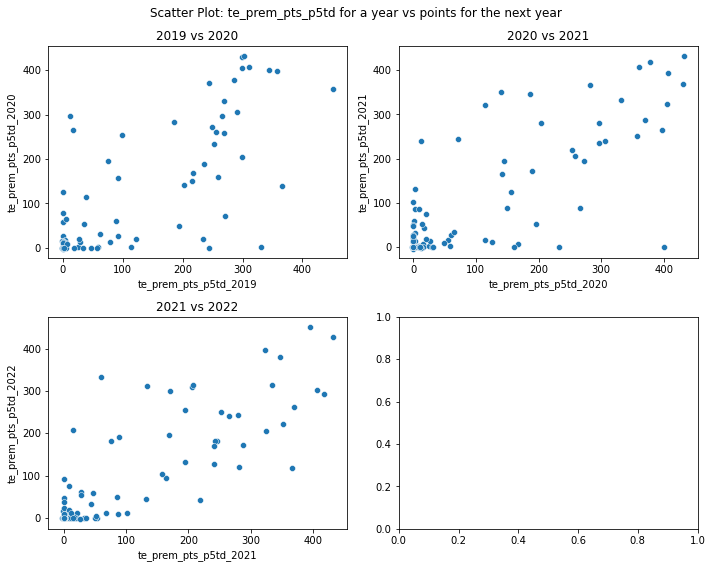

In [67]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: QB points for a season vs points for the next')

# Iterate through each year and create the scatter plot in the corresponding subplot
years = [2019, 2020, 2021]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'te_prem_pts_p5td_{year}', y=f'te_prem_pts_p5td_{next_year}', data= qb_wide, ax=axes[row, col])
    axes[row, col].set_title(f'{year} vs {next_year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

Text(0, 0.5, 'QB Fantasy points in previous season (2021)')

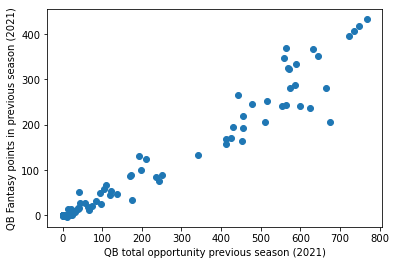

In [23]:
plt.scatter(qb_wide['ttl_opp_2021'], qb_wide['te_prem_pts_p5td_2021'])
plt.xlabel('QB total opportunity previous season (2021)')
plt.ylabel('QB Fantasy points in previous season (2021)')

plt.show()

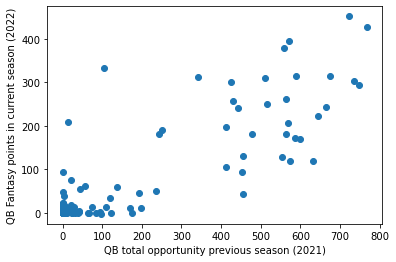

In [25]:
# how does previous amount of touches in previous year reflect next year's points?

plt.scatter(qb_wide['ttl_opp_2021'], qb_wide['te_prem_pts_p5td_2022'])
plt.xlabel('QB total opportunity previous season (2021)')
plt.ylabel('QB Fantasy points in current season (2022)')

plt.show()

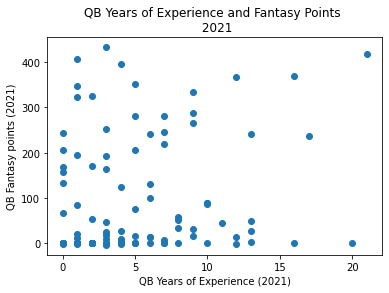

In [32]:
plt.scatter(qb_wide['years_exp_2021'], qb_wide['te_prem_pts_p5td_2021'] )
plt.xlabel('QB Years of Experience (2021)')
plt.ylabel('QB Fantasy points (2021)')
plt.title('QB Years of Experience and Fantasy Points \n 2021')

plt.show()

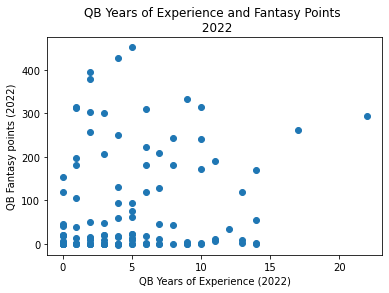

In [33]:
plt.scatter(qb_wide['years_exp_2022'], qb_wide['te_prem_pts_p5td_2022'] )
plt.xlabel('QB Years of Experience (2022)')
plt.ylabel('QB Fantasy points (2022)')
plt.title('QB Years of Experience and Fantasy Points \n 2022')

plt.show()

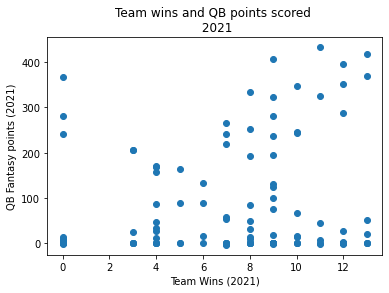

In [48]:
plt.scatter(qb_wide['wins_2021'], qb_wide['te_prem_pts_p5td_2021'] )
plt.xlabel('Team Wins (2021)')
plt.ylabel('QB Fantasy points (2021)')
plt.title('Team wins and QB points scored \n 2021')

plt.show()

<AxesSubplot:>

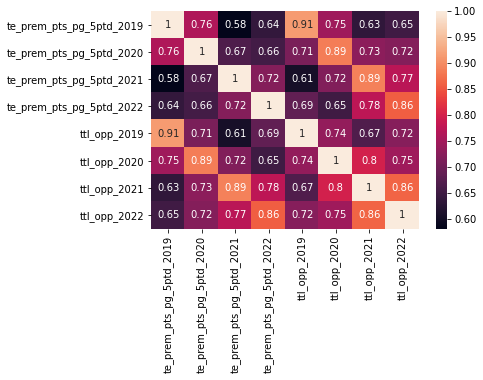

In [34]:
# let's check correlation between a few of these

sns.heatmap(qb_wide[['te_prem_pts_pg_5ptd_2019', 'te_prem_pts_pg_5ptd_2020', 'te_prem_pts_pg_5ptd_2021'\
                     , 'te_prem_pts_pg_5ptd_2022', 'ttl_opp_2019','ttl_opp_2020', 'ttl_opp_2021', 'ttl_opp_2022']]\
            .corr(), annot = True)

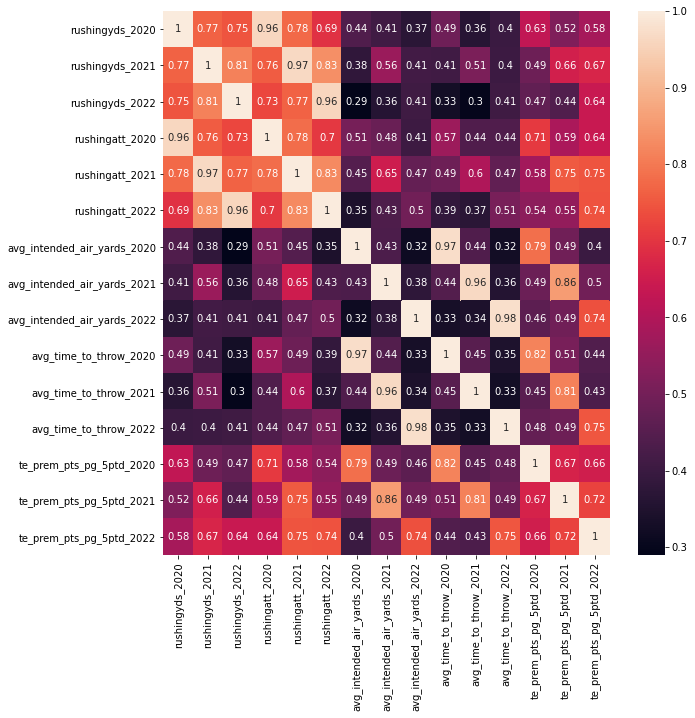

In [56]:
# let's look at a few more

plt.figure(figsize = (10,10))

sns.heatmap(qb_wide[['rushingyds_2020', 'rushingyds_2021', 'rushingyds_2022',
                     'rushingatt_2020', 'rushingatt_2021', 'rushingatt_2022',
                   'avg_intended_air_yards_2020', 'avg_intended_air_yards_2021',
                   'avg_intended_air_yards_2022', 'avg_time_to_throw_2020' , 'avg_time_to_throw_2021', 
                   'avg_time_to_throw_2022', 'te_prem_pts_pg_5ptd_2020',
                   'te_prem_pts_pg_5ptd_2021', 'te_prem_pts_pg_5ptd_2022']].corr(), annot = True)

plt.show()

For QBs, past success seems to be indicitive of future success - even scores from 3 years ago all give a moderately high correlation to points (.64 for 2019 to 2022, .66 for 2020 to 2022, and .72 for the following year). Opportunities and points per game all are fairly high. Also, stats like rushing yards, as expected, have a moderate to strong correlation with points, even year over year for following years. Interestingly, though, attempts has a higher correlation with points. Intended air yards definitely have an impact in-year on points, but not as strong year over year. Same with time to throw.

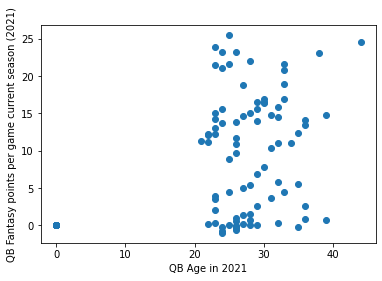

In [60]:
plt.scatter(qb_wide['age_2021'], qb_wide['te_prem_pts_pg_5ptd_2021'])
plt.xlabel('QB Age in 2021')
plt.ylabel('QB Fantasy points per game current season (2021)')

plt.show()


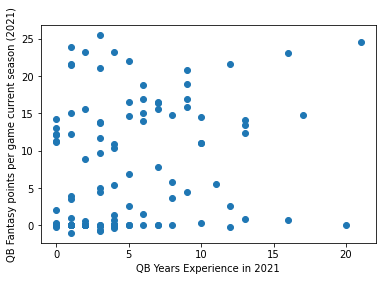

In [62]:
plt.scatter(qb_wide['years_exp_2021'], qb_wide['te_prem_pts_pg_5ptd_2021'])
plt.xlabel('QB Years Experience in 2021')
plt.ylabel('QB Fantasy points per game current season (2021)')

plt.show()

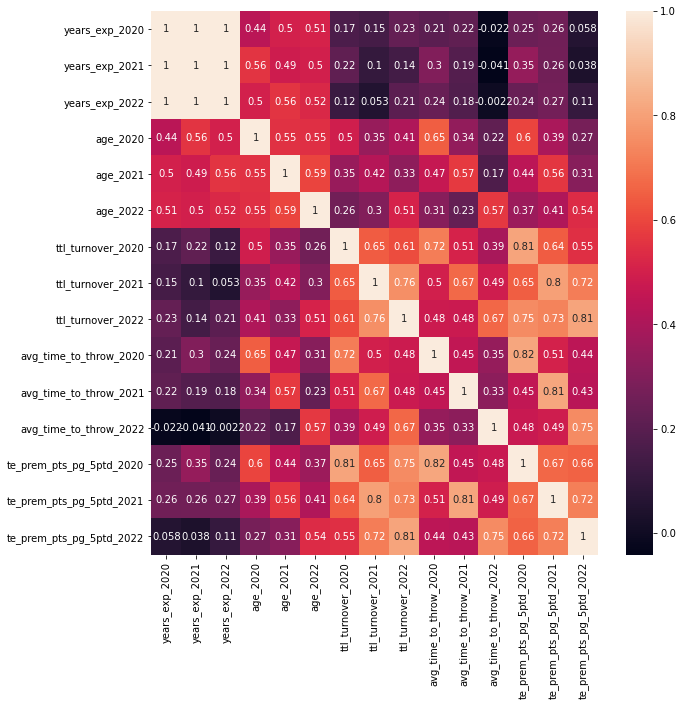

In [64]:
# let's look at a few more

plt.figure(figsize = (10,10))

sns.heatmap(qb_wide[['years_exp_2020', 'years_exp_2021', 'years_exp_2022',
                     'age_2020', 'age_2021', 'age_2022',
                   'ttl_turnover_2020', 'ttl_turnover_2021',
                   'ttl_turnover_2022', 'avg_time_to_throw_2020' , 'avg_time_to_throw_2021', 
                   'avg_time_to_throw_2022', 'te_prem_pts_pg_5ptd_2020',
                   'te_prem_pts_pg_5ptd_2021', 'te_prem_pts_pg_5ptd_2022']].corr(), annot = True)

plt.show()

Seems age has a higher correlation on points scored than years experience. We'll use age for that measure. 

Average intended air yards is quite dependent on average time to throw. The more time to throw, the further the qbs throw. and thn the more fantasy points they score.


Text(0, 0.5, 'QB Fantasy points per game current season (2021)')

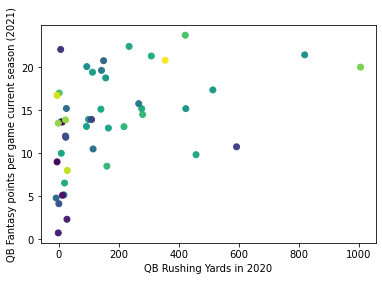

In [39]:
plt.scatter(ff_qb['rushingyds_20'], ff_qb['fp_per_gm21'])
plt.xlabel('QB Rushing Yards in 2020')
plt.ylabel('QB Fantasy points per game current season (2021)')

Text(0, 0.5, 'QB Fantasy points per game current season (2021)')

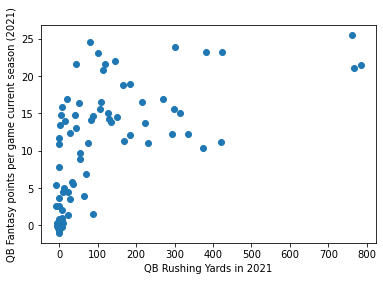

In [51]:
plt.scatter(qb_wide['rushingyds_2021'], qb_wide['te_prem_pts_pg_5ptd_2021'])
plt.xlabel('QB Rushing Yards in 2021')
plt.ylabel('QB Fantasy points per game current season (2021)')

Text(0, 0.5, 'QB Fantasy points per game current season (2021)')

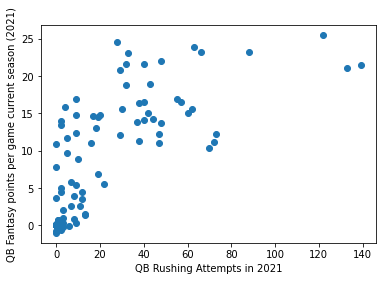

In [53]:
plt.scatter(qb_wide['rushingatt_2021'], qb_wide['te_prem_pts_pg_5ptd_2021'])
plt.xlabel('QB Rushing Attempts in 2021')
plt.ylabel('QB Fantasy points per game current season (2021)')

Text(0, 0.5, 'QB Fantasy points per game current season (2021)')

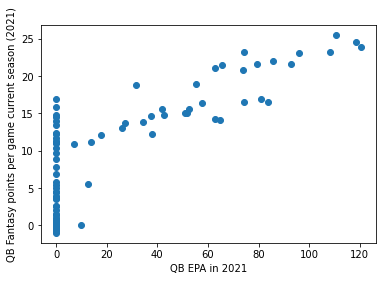

In [58]:
plt.scatter(qb_wide['epa_total_2021'], qb_wide['te_prem_pts_pg_5ptd_2021'])
plt.xlabel('QB EPA in 2021')
plt.ylabel('QB Fantasy points per game current season (2021)')

Next: either more visualizations, or try to start modeling for QBs. Perhaps visualizations while transforming data if necessary.

### RB

In [40]:
rb_wide.head()

,1std_2019,1std_2020,1std_2021,1std_2022,adp_2019,adp_2020,adp_2021,adp_2022,age_2019,age_2020,age_2021,age_2022,aggressiveness_2019,aggressiveness_2020,aggressiveness_2021,aggressiveness_2022,attempts_2019,attempts_2020,attempts_2021,attempts_2022,avg_air_distance_2019,avg_air_distance_2020,avg_air_distance_2021,avg_air_distance_2022,avg_air_yards_differential_2019,avg_air_yards_differential_2020,avg_air_yards_differential_2021,avg_air_yards_differential_2022,avg_air_yards_to_sticks_2019,avg_air_yards_to_sticks_2020,avg_air_yards_to_sticks_2021,avg_air_yards_to_sticks_2022,avg_completed_air_yards_2019,avg_completed_air_yards_2020,avg_completed_air_yards_2021,avg_completed_air_yards_2022,avg_intended_air_yards_2019,avg_intended_air_yards_2020,avg_intended_air_yards_2021,avg_intended_air_yards_2022,avg_per_catch_2019,avg_per_catch_2020,avg_per_catch_2021,avg_per_catch_2022,avg_per_rush_2019,avg_per_rush_2020,avg_per_rush_2021,avg_per_rush_2022,avg_per_tgt_2019,avg_per_tgt_2020,avg_per_tgt_2021,avg_per_tgt_2022,avg_time_to_los_2019,avg_time_to_los_2020,avg_time_to_los_2021,avg_time_to_los_2022,avg_time_to_throw_2019,avg_time_to_throw_2020,avg_time_to_throw_2021,avg_time_to_throw_2022,cmp_2019,cmp_2020,cmp_2021,cmp_2022,completion_percentage_above_expectation_2019,completion_percentage_above_expectation_2020,completion_percentage_above_expectation_2021,completion_percentage_above_expectation_2022,defense_2019,defense_2020,defense_2021,defense_2022,dkpt_2019,dkpt_2020,dkpt_2021,dkpt_2022,efficiency_2019,efficiency_2020,efficiency_2021,efficiency_2022,expected_completion_percentage_2019,expected_completion_percentage_2020,expected_completion_percentage_2021,expected_completion_percentage_2022,expected_rush_yards_2019,expected_rush_yards_2020,expected_rush_yards_2021,expected_rush_yards_2022,fantasypoints_2019,fantasypoints_2020,fantasypoints_2021,fantasypoints_2022,fdpt_2019,fdpt_2020,fdpt_2021,fdpt_2022,fp_per_gm_2019,fp_per_gm_2020,fp_per_gm_2021,fp_per_gm_2022,fp_per_opp_2019,fp_per_opp_2020,fp_per_opp_2021,fp_per_opp_2022,fumbles_2019,fumbles_2020,fumbles_2021,fumbles_2022,fumbleslost_2019,fumbleslost_2020,fumbleslost_2021,fumbleslost_2022,g_2019,g_2020,g_2021,g_2022,gs_2019,gs_2020,gs_2021,gs_2022,height_2019,height_2020,height_2021,height_2022,hppr_fp_2019,hppr_fp_2020,hppr_fp_2021,hppr_fp_2022,hppr_fp_5ptd_2019,hppr_fp_5ptd_2020,hppr_fp_5ptd_2021,hppr_fp_5ptd_2022,hppr_pts_pg_5ptd_2019,hppr_pts_pg_5ptd_2020,hppr_pts_pg_5ptd_2021,hppr_pts_pg_5ptd_2022,int_2019,int_2020,int_2021,int_2022,interceptions_2019,interceptions_2020,interceptions_2021,interceptions_2022,losses_2019,losses_2020,losses_2021,losses_2022,max_air_distance_2019,max_air_distance_2020,max_air_distance_2021,max_air_distance_2022,max_completed_air_distance_2019,max_completed_air_distance_2020,max_completed_air_distance_2021,max_completed_air_distance_2022,non_pass_tds_2019,non_pass_tds_2020,non_pass_tds_2021,non_pass_tds_2022,offense_2019,offense_2020,offense_2021,offense_2022,pass_touchdowns_2019,pass_touchdowns_2020,pass_touchdowns_2021,pass_touchdowns_2022,pass_yards_2019,pass_yards_2020,pass_yards_2021,pass_yards_2022,passer_rating_2019,passer_rating_2020,passer_rating_2021,passer_rating_2022,passingatt_2019,passingatt_2020,passingatt_2021,passingatt_2022,passingtd_2019,passingtd_2020,passingtd_2021,passingtd_2022,passingyds_2019,passingyds_2020,passingyds_2021,passingyds_2022,passy_2019,passy_2020,passy_2021,passy_2022,passyds_allowed_2019,passyds_allowed_2020,passyds_allowed_2021,passyds_allowed_2022,pct_gs_2019,pct_gs_2020,pct_gs_2021,pct_gs_2022,percent_attempts_gte_eight_defenders_2019,percent_attempts_gte_eight_defenders_2020,percent_attempts_gte_eight_defenders_2021,percent_attempts_gte_eight_defenders_2022,ppr_2019,ppr_2020,ppr_2021,ppr_2022,pts_allowed_2019,pts_allowed_2020,pts_allowed_2021,pts_allowed_2022,pts_scored_2019,pts_scored_2020,pts_scored_2021,pts_scored_2022,rec_2019,rec_2020,rec_2021,rec_2022,receivingtd_2019,receivingtd_2020,receiving

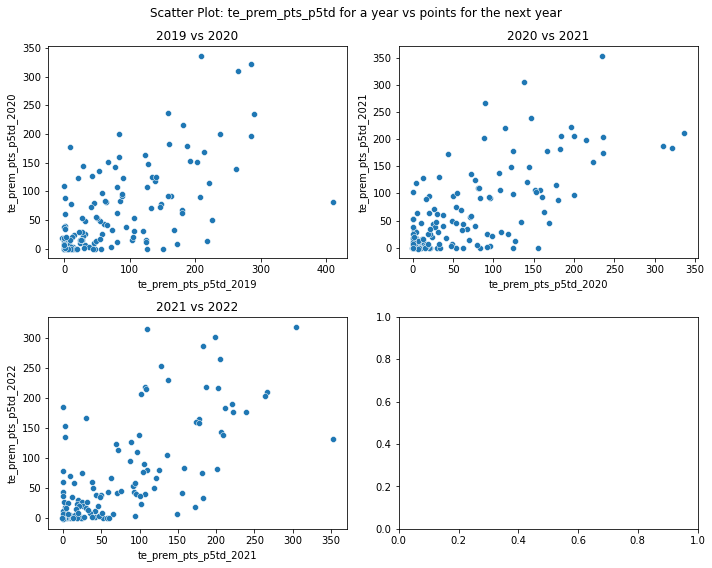

In [66]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: te_prem_pts_p5td for a year vs points for the next year')

# Iterate through each year and create the scatter plot in the corresponding subplot
years = [2019, 2020, 2021]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'te_prem_pts_p5td_{year}', y=f'te_prem_pts_p5td_{next_year}', data=rb_wide, ax=axes[row, col])
    axes[row, col].set_title(f'{year} vs {next_year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

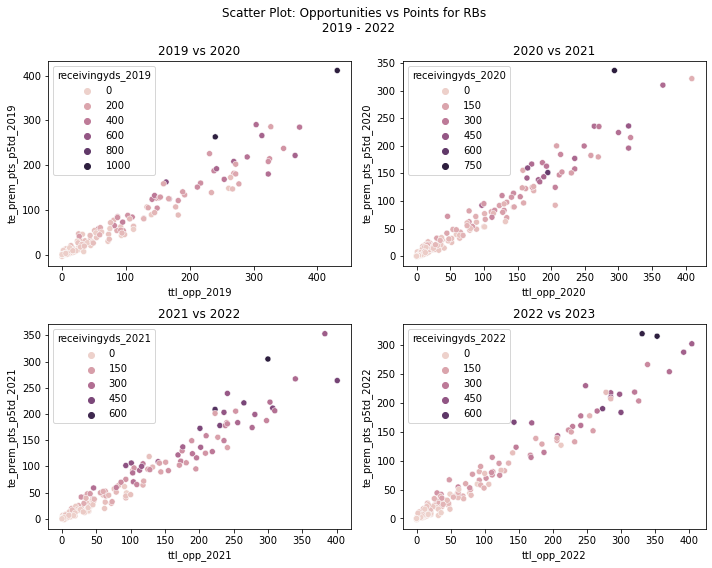

In [81]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: Opportunities vs Points for RBs \n 2019 - 2022')

# Iterate through each year and create the scatter plot in the corresponding subplot
# total opportunities vs fantasy points
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'ttl_opp_{year}', y=f'te_prem_pts_p5td_{year}', hue = f'receivingyds_{year}', data=rb_wide, ax=axes[row, col])
    axes[row, col].set_title(f'{year} vs {next_year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

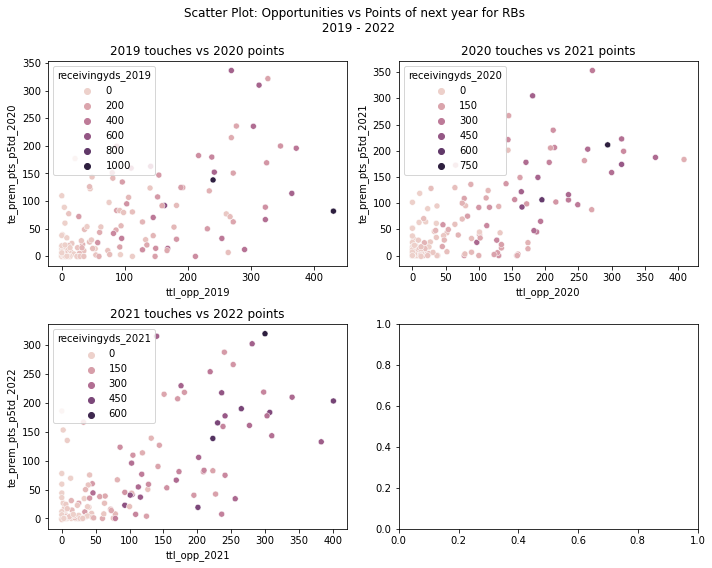

In [80]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Scatter Plot: Opportunities vs Points of next year for RBs \n 2019 - 2022')

# Iterate through each year and create the scatter plot in the corresponding subplot
# total opportunities vs fantasy points
years = [2019, 2020, 2021]
for i, year in enumerate(years):
    next_year = year + 1
    row = i // 2
    col = i % 2
    sns.scatterplot(x=f'ttl_opp_{year}', y=f'te_prem_pts_p5td_{next_year}', hue = f'receivingyds_{year}', data=rb_wide, ax=axes[row, col])
    axes[row, col].set_title(f'{year} touches vs {next_year} points')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

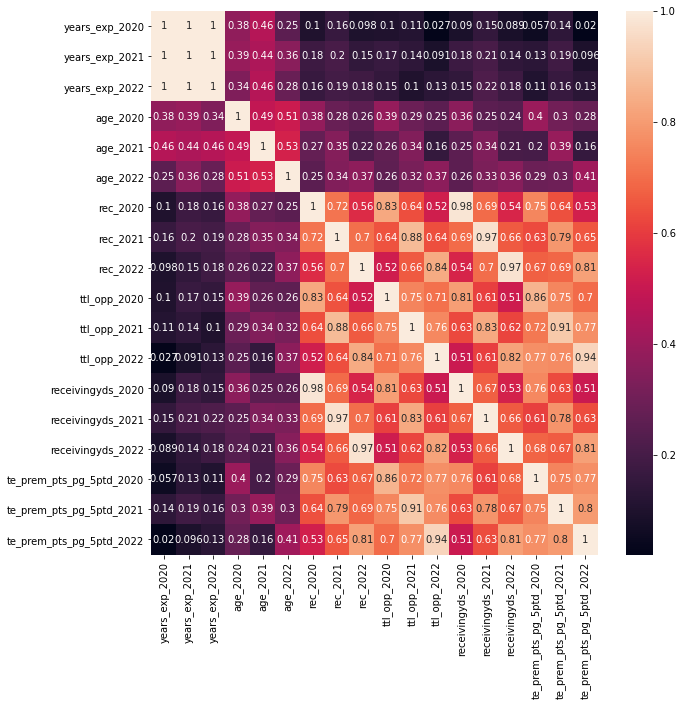

In [84]:
# let's look at a few more

plt.figure(figsize = (10,10))

sns.heatmap(rb_wide[['years_exp_2020', 'years_exp_2021', 'years_exp_2022',
                     'age_2020', 'age_2021', 'age_2022',
                   'rec_2020', 'rec_2021',
                   'rec_2022', 'ttl_opp_2020' , 'ttl_opp_2021', 
                   'ttl_opp_2022', 'receivingyds_2020', 'receivingyds_2021',
                     'receivingyds_2022', 'te_prem_pts_pg_5ptd_2020',
                   'te_prem_pts_pg_5ptd_2021', 'te_prem_pts_pg_5ptd_2022']].corr(), annot = True)

plt.show()

Past year scoring has a high correlation (.75 - .8) with following years. Tll opportunities seem to more as well, and more than receptions. Age doesn't but perhaps that can change when filtering out a few more. Age seems to have more, though, than years experience.

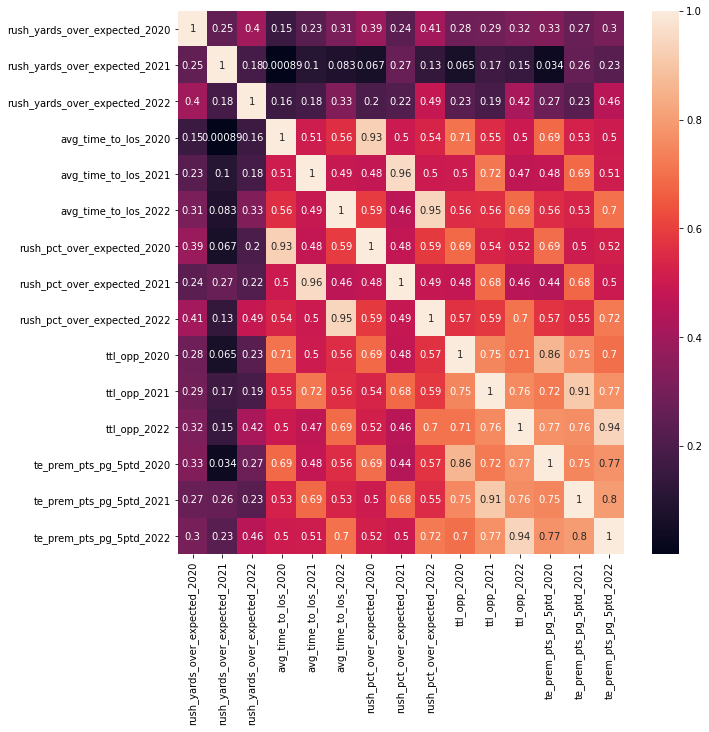

In [83]:
# let's look at a few more

plt.figure(figsize = (10,10))

sns.heatmap(rb_wide[['rush_yards_over_expected_2020', 'rush_yards_over_expected_2021', 'rush_yards_over_expected_2022',
                     'avg_time_to_los_2020', 'avg_time_to_los_2021', 'avg_time_to_los_2022',
                   'rush_pct_over_expected_2020', 'rush_pct_over_expected_2021',
                   'rush_pct_over_expected_2022', 'ttl_opp_2020' , 'ttl_opp_2021', 
                   'ttl_opp_2022', 'te_prem_pts_pg_5ptd_2020',
                   'te_prem_pts_pg_5ptd_2021', 'te_prem_pts_pg_5ptd_2022']].corr(), annot = True)

plt.show()

AVG_time_to_los and rush_pct over expected each have moderate correlations with points. We're going to use rush_pct_over_expected

Text(0, 0.5, 'RB Fantasy points in previous season (2020)')

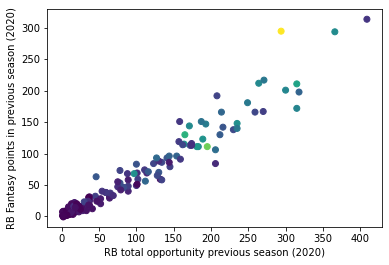

In [49]:
plt.scatter(ff_rb['ttl_opp20'], ff_rb['fantasypoints_20'], c = ff_rb['receivingyds_20'])
plt.xlabel('RB total opportunity previous season (2020)')
plt.ylabel('RB Fantasy points in previous season (2020)')

Text(0, 0.5, 'RB total HPPR in 2021')

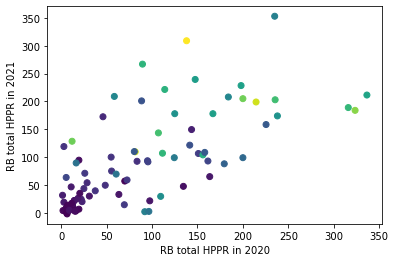

In [86]:
plt.scatter(ff_rb['fantasypoints_20hppr'], ff_rb['fantasypoints_21hppr'], c = ff_rb['fantasypoints_22hppr'])
plt.xlabel('RB total HPPR in 2020')
plt.ylabel('RB total HPPR in 2021')

Text(0, 0.5, 'RB HPPR Fantasy Points (2021)')

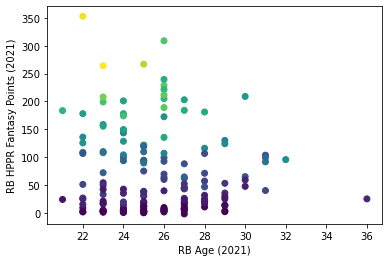

In [63]:
plt.scatter(ff_rb['age'], ff_rb['fantasypoints_21hppr'], c = ff_rb['ttl_touch21'])
plt.xlabel('RB Age (2021)')
plt.ylabel('RB HPPR Fantasy Points (2021)')

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'RB HPPR Fantasy points in season(2021)')

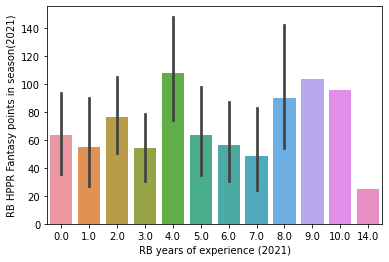

In [69]:
sns.barplot(ff_rb['years_exp'], ff_rb['fantasypoints_21hppr'])
plt.xlabel('RB years of experience (2021)')
plt.ylabel('RB HPPR Fantasy points in season(2021)')

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'RB HPPR Fantasy points in season(2020)')

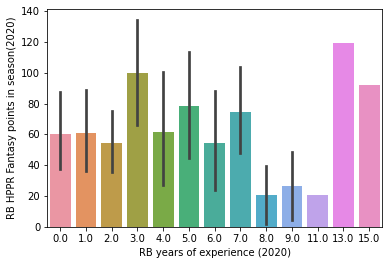

In [70]:
sns.barplot(ff_rb['years_exp_20'], ff_rb['fantasypoints_20hppr'])
plt.xlabel('RB years of experience (2020)')
plt.ylabel('RB HPPR Fantasy points in season(2020)')

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'RB Fantasy points per game in season(2020)')

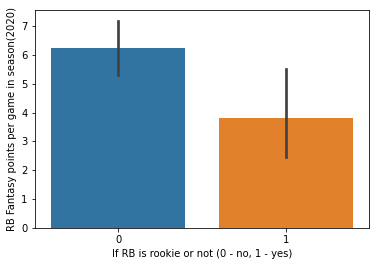

In [130]:
sns.barplot(ff_rb['rookie22'], ff_rb['fp_per_gm22hppr'] )
plt.xlabel('If RB is rookie or not (0 - no, 1 - yes)')
plt.ylabel('RB Fantasy points per game in season(2020)')

<AxesSubplot:>

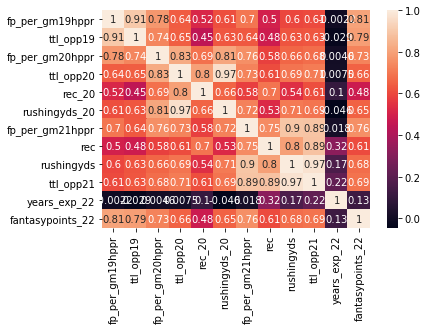

In [134]:
sns.heatmap(ff_rb[['fp_per_gm19hppr', 'ttl_opp19','fp_per_gm20hppr', 'ttl_opp20', 'rec_20',
                   'rushingyds_20', 'fp_per_gm21hppr',  'rec', 'rushingyds', 
                   'ttl_opp21','years_exp_22', 'fantasypoints_22' ]].corr(), annot = True)

In [92]:
ff_rb.describe()

,height_19,weight_19,years_exp_19,age_19,g_19,gs_19,tgt_19,rec_19,passingyds_19,passingtd_19,passingatt_19,rushingyds_19,rushingtd_19,rushingatt_19,receivingyds_19,receivingtd_19,fantasypoints_19,int_19,fumbles_19,fumbleslost_19,height_20,weight_20,years_exp_20,age_20,g_20,gs_20,tgt_20,rec_20,passingyds_20,passingtd_20,passingatt_20,rushingyds_20,rushingtd_20,rushingatt_20,receivingyds_20,receivingtd_20,fantasypoints_20,int_20,fumbles_20,fumbleslost_20,height,weight,years_exp,rookie_year,age,g,gs,tgt,rec,passingyds,passingtd,passingatt,rushingyds,rushingtd,rushingatt,receivingyds,receivingtd,fantasypoints,int,fumbles,fumbleslost,height_22,weight_22,years_exp_22,rookie_year_22,fantasypoints_22,pts/g,gp,cmp,passingyds_22,passingtd_22,int_22,rushingatt_22,rushingyds_22,rushingtd_22,fumbles_22,tgt_22,rec_22,receivingyds_22,receivingtd_22,season_19_x,season_20_x,season_x,avg_intended_air_yards,season_22_x,efficiency_19,percent_attempts_gte_eight_defenders_19,avg_time_to_los_19,rush_attempts_19,rush_yards_19,expected_rush_yards_19,rush_yards_over_expected_19,avg_rush_yards_19,rush_yards_over_expected_per_att_19,rush_pct_over_expected_19,rush_touchdowns_19,efficiency_20,percent_attempts_gte_eight_defenders_20,avg_time_to_los_20,rush_attempts_20,rush_yards_20,expected_rush_yards_20,rush_yards_over_expected_20,avg_rush_yards_20,rush_yards_over_expected_per_att_20,rush_pct_over_expected_20,rush_touchdowns_20,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,rush_attempts,rush_yards,expected_rush_yards,rush_yards_over_expected,avg_rush_yards,rush_yards_over_expected_per_att,rush_pct_over_expected,rush_touchdowns,efficiency_22,percent_attempts_gte_eight_defenders_22,avg_time_to_los_22,rush_attempts_22,rush_yards_22,expected_rush_yards_22,rush_yards_over_expected_22,avg_rush_yards_22,rush_yards_over_expected_per_att_22,rush_pct_over_expected_22,rush_touchdowns_22,avg_separation,percent_share_of_intended_air_yards,receptions,targets,catch_percentage,yards,rec_touchdowns,avg_yac,avg_expected_yac,avg_yac_above_expectation,pct_gs19,pct_gs20,pct_gs21,avg_per_rush19,avg_per_rush20,avg_per_rush21,avg_per_catch19,avg_per_catch20,avg_per_catch21,avg_per_tgt19,avg_per_tgt20,avg_per_tgt21,ttl_touch19,ttl_touch20,ttl_touch21,ttl_opp19,ttl_opp20,ttl_opp21,ttl_opp_per_game19,ttl_opp_per_game20,ttl_opp_per_game21,yds_per_opp19,yds_per_opp20,yds_per_opp21,td_per_opp19,td_per_opp20,td_per_opp21,turnover_per_opp19,turnover_per_opp20,turnover_per_opp21,fp_per_opp19,fp_per_opp20,fp_per_opp21,fp_per_gm19,fp_per_gm20,fp_per_gm21,rookie19,rookie20,rookie21,fantasypoints_19hppr,fantasypoints_20hppr,fantasypoints_21hppr,fp_per_gm19hppr,fp_per_gm20hppr,fp_per_gm21hppr,avg_per_rush22,avg_per_catch22,avg_per_tgt22,ttl_touch22,ttl_opp22,ttl_opp_per_game22,yds_per_opp22,td_per_opp22,turnover_per_opp22,fp_per_opp22,fp_per_gm22,rookie22,fantasypoints_22hppr,fp_per_gm22hppr
count,167.000000,167.000000,165.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.0,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.00000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.0,167.0,167.0,167.000000,167.000000,167.000000,167.000000,167.000000,158.000000,167.0,167.000000,167.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,161.000000,175.000000,175.000000,175.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,83.0,98.0,90.0,1.000000,81.0,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000

### RBs Fantasy Performance and Next Gen Stats

Some columns that will have interest are:

    expected_rush_yards, avg_rush_yards, rush_yards_over_expected_per_att, rush_pct_over_expected_20, avg_time_to_los, efficiency
   

In [141]:
ff_rb[['expected_rush_yards', 'avg_rush_yards', 
       'rush_yards_over_expected_per_att', 'rush_pct_over_expected',
       'avg_time_to_los', 'tgt', 'efficiency']].describe()

,expected_rush_yards,avg_rush_yards,rush_yards_over_expected_per_att,rush_pct_over_expected,avg_time_to_los,tgt,efficiency
count,89.000000,89.000000,89.000000,89.000000,89.000000,269.000000,89.000000
mean,99.080604,4.201880,0.056283,0.381529,2.785036,13.044610,4.284010
std,43.855046,1.117222,1.002475,0.084128,0.186040,20.142724,0.990263
min,29.828809,1.777273,-2.598908,0.181818,2.251462,0.000000,2.037176
25%,54.694298,3.643813,-0.430424,0.336475,2.688563,0.000000,3.803401
50%,114.461527,4.190390,0.012104,0.385745,2.779051,2.000000,4.094812
75%,133.022209,4.650470,0.385887,0.418415,2.852184,20.000000,4.578386
max,203.814883,10.916667,5.612688,0.636364,3.547667,94.000000,8.602485


<AxesSubplot:>

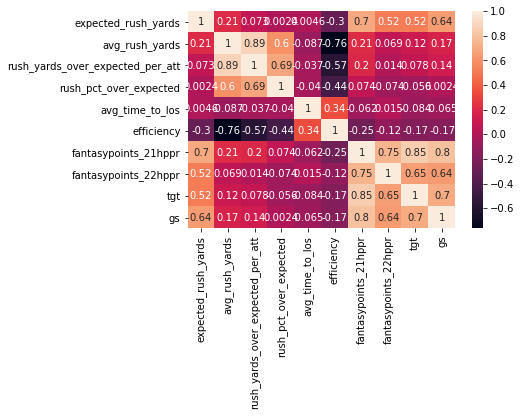

In [146]:
sns.heatmap(ff_rb[['expected_rush_yards', 'avg_rush_yards', 
       'rush_yards_over_expected_per_att', 'rush_pct_over_expected',
       'avg_time_to_los', 'efficiency', 'fantasypoints_21hppr', 'fantasypoints_22hppr', 'tgt', 'gs']].corr(), annot = True)

In [145]:
# let's see average amount of games played and points scored, to try to find a cutoff

ff_rb[['fantasypoints_21hppr', 'fantasypoints_22hppr', 
       'gp', 'gs']].describe()

,fantasypoints_21hppr,fantasypoints_22hppr,gp,gs
count,161.000000,152.000000,152.000000,175.000000
mean,68.847826,72.888158,11.677632,3.674286
std,73.823248,83.048215,5.244489,4.957541
min,-2.000000,-2.000000,1.000000,0.000000
25%,10.500000,10.125000,8.000000,0.000000
50%,40.000000,37.000000,13.000000,1.000000
75%,107.000000,108.800000,16.000000,5.500000
max,353.000000,354.200000,17.000000,17.000000


In [149]:
ff_rb['fantasypoints_21hppr'].quantile(.75)

107.0

In [147]:
# subsetting to get 'qualifying' RBs

ff_rb_qual = ff_rb.loc[(ff_rb['fantasypoints_21hppr'] >= ff_rb['fantasypoints_21hppr'].quantile(.75))]

<AxesSubplot:>

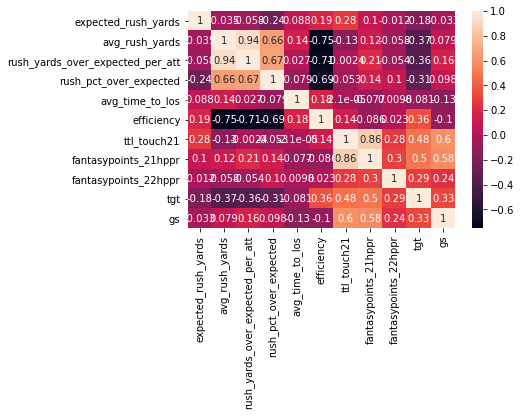

In [150]:
sns.heatmap(ff_rb_qual[['expected_rush_yards', 'avg_rush_yards', 
       'rush_yards_over_expected_per_att', 'rush_pct_over_expected',
       'avg_time_to_los', 'efficiency', 'ttl_touch21', 'fantasypoints_21hppr', 'fantasypoints_22hppr', 'tgt', 'gs']].corr(), annot = True)

### WR

In [99]:
ff_wr.describe()

,height_19,weight_19,years_exp_19,age_19,g_19,gs_19,tgt_19,rec_19,passingyds_19,passingtd_19,passingatt_19,rushingyds_19,rushingtd_19,rushingatt_19,receivingyds_19,receivingtd_19,fantasypoints_19,int_19,fumbles_19,fumbleslost_19,height_20,weight_20,years_exp_20,age_20,g_20,gs_20,tgt_20,rec_20,passingyds_20,passingtd_20,passingatt_20,rushingyds_20,rushingtd_20,rushingatt_20,receivingyds_20,receivingtd_20,fantasypoints_20,int_20,fumbles_20,fumbleslost_20,height,weight,years_exp,rookie_year,age,g,gs,tgt,rec,passingyds,passingtd,passingatt,rushingyds,rushingtd,rushingatt,receivingyds,receivingtd,fantasypoints,int,fumbles,fumbleslost,height_22,weight_22,years_exp_22,rookie_year_22,fantasypoints_22,pts/g,gp,cmp,passingyds_22,passingtd_22,int_22,rushingatt_22,rushingyds_22,rushingtd_22,fumbles_22,tgt_22,rec_22,receivingyds_22,receivingtd_22,season_19_x,avg_intended_air_yards_19,season_20_x,avg_time_to_throw_20,avg_completed_air_yards_20,avg_intended_air_yards_20,avg_air_yards_differential_20,aggressiveness_20,max_completed_air_distance_20,avg_air_yards_to_sticks_20,attempts_20,pass_yards_20,pass_touchdowns_20,interceptions_20,passer_rating_20,completions_20,completion_percentage_20,expected_completion_percentage_20,completion_percentage_above_expectation_20,avg_air_distance_20,max_air_distance_20,season_x,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness,max_completed_air_distance,avg_air_yards_to_sticks,attempts,pass_yards,pass_touchdowns,interceptions,passer_rating,completions,completion_percentage,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,season_22_x,avg_intended_air_yards_22,efficiency_20,percent_attempts_gte_eight_defenders_20,avg_time_to_los_20,rush_attempts_20,rush_yards_20,expected_rush_yards_20,rush_yards_over_expected_20,avg_rush_yards_20,rush_yards_over_expected_per_att_20,rush_pct_over_expected_20,rush_touchdowns_20,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,rush_attempts,rush_yards,expected_rush_yards,rush_yards_over_expected,avg_rush_yards,rush_yards_over_expected_per_att,rush_pct_over_expected,rush_touchdowns,efficiency_22,percent_attempts_gte_eight_defenders_22,avg_time_to_los_22,rush_attempts_22,rush_yards_22,expected_rush_yards_22,rush_yards_over_expected_22,avg_rush_yards_22,rush_yards_over_expected_per_att_22,rush_pct_over_expected_22,rush_touchdowns_22,avg_cushion_19,avg_separation_19,percent_share_of_intended_air_yards_19,receptions_19,targets_19,catch_percentage_19,yards_19,rec_touchdowns_19,avg_yac_19,avg_expected_yac_19,avg_yac_above_expectation_19,avg_cushion_20,avg_separation_20,percent_share_of_intended_air_yards_20,receptions_20,targets_20,catch_percentage_20,yards_20,rec_touchdowns_20,avg_yac_20,avg_expected_yac_20,avg_yac_above_expectation_20,avg_cushion,avg_separation,percent_share_of_intended_air_yards,receptions,targets,catch_percentage,yards,rec_touchdowns,avg_yac,avg_expected_yac,avg_yac_above_expectation,avg_cushion_22,avg_separation_22,percent_share_of_intended_air_yards_22,receptions_22,targets_22,catch_percentage_22,yards_22,rec_touchdowns_22,avg_yac_22,avg_expected_yac_22,avg_yac_above_expectation_22,season_19_y,player_id_y,qbr_total_19,pts_added_19,qb_plays_19,epa_total_19,pass_19,run_19,exp_sack_19,qbr_raw_19,sack_19,season_22_y,qbr_total_22,pts_added_22,qb_plays_22,epa_total_22,pass_22,run_22,exp_sack_22,qbr_raw_22,sack_22,pct_gs19,pct_gs20,pct_gs21,avg_per_rush19,avg_per_rush20,avg_per_rush21,avg_per_catch19,avg_per_catch20,avg_per_catch21,avg_per_tgt19,avg_per_tgt20,avg_per_tgt21,ttl_touch19,ttl_touch20,ttl_touch21,ttl_opp19,ttl_opp20,ttl_opp21,ttl_opp_per_game19,ttl_opp_per_game20,ttl_opp_per_game21,yds_per_opp19,yds_per_opp20,yds_per_opp21,td_per_opp19,td_per_opp20,td_per_opp21,turnover_per_opp19,turnover_per_opp20,turnover_per_opp21,fp_per_opp19,fp_per_opp20,fp_per_opp21,fp_per_gm19,fp_per_gm20,fp_per_gm21,rookie19,rookie20,rookie21,fantasypoints_

Text(0, 0.5, 'WR Fantasy points per game current season (2022)')

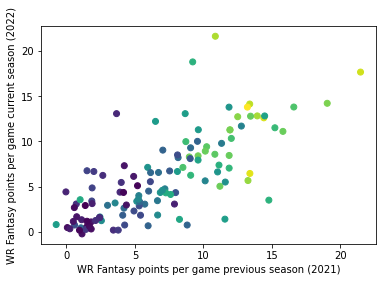

In [105]:
plt.scatter( ff_wr['fp_per_gm20hppr'],ff_wr['fp_per_gm21hppr'], c = ff_wr['fp_per_gm19hppr'])
plt.xlabel('WR Fantasy points per game previous season (2021)')
plt.ylabel('WR Fantasy points per game current season (2022)')

Text(0, 0.5, 'WR Fantasy points per game current season (2022)')

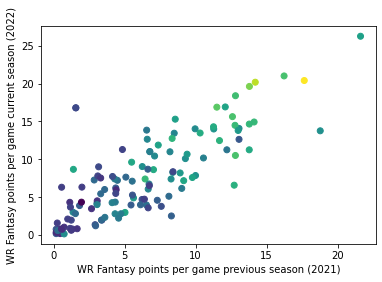

In [106]:
plt.scatter( ff_wr['fp_per_gm21hppr'],ff_wr['fp_per_gm22hppr'], c = ff_wr['fp_per_gm20hppr'])
plt.xlabel('WR Fantasy points per game previous season (2021)')
plt.ylabel('WR Fantasy points per game current season (2022)')

Text(0, 0.5, 'WR Fantasy points per game in 2021')

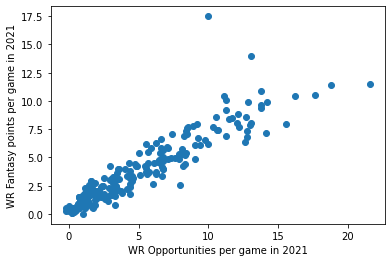

In [111]:
plt.scatter( ff_wr['ttl_opp_per_game21'], ff_wr['fp_per_gm21hppr'])
plt.xlabel('WR Opportunities per game in 2021')
plt.ylabel('WR Fantasy points per game in 2021')

Text(0, 0.5, 'WR Fantasy points in 2021')

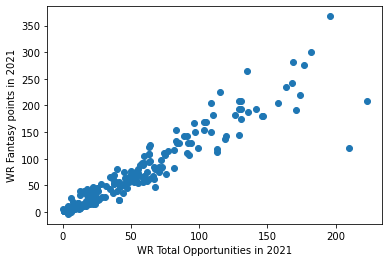

In [112]:
plt.scatter( ff_wr['ttl_opp21'], ff_wr['fantasypoints_21hppr'])
plt.xlabel('WR Total Opportunities in 2021')
plt.ylabel('WR Fantasy points in 2021')

Text(0, 0.5, 'WR Fantasy points in season(2021)')

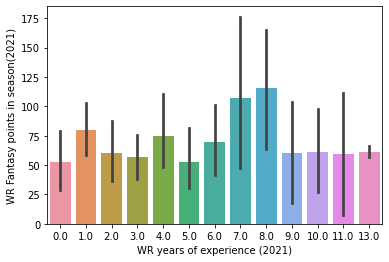

In [125]:
sns.barplot( data = ff_wr, x = 'years_exp', y = 'fantasypoints_21hppr')
plt.xlabel('WR years of experience (2021)')
plt.ylabel('WR Fantasy points in season(2021)')

Text(0, 0.5, 'WR Fantasy points in season(2021)')

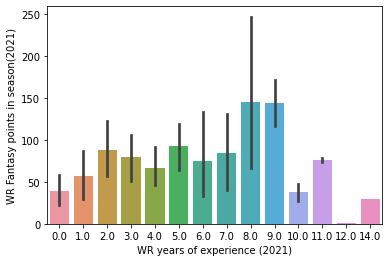

In [126]:
sns.barplot( data = ff_wr, x = 'years_exp_22', y = 'fantasypoints_22hppr')
plt.xlabel('WR years of experience (2021)')
plt.ylabel('WR Fantasy points in season(2021)')

In [119]:
figure, axes = plt.subplot(2, 2, figsize = (10,5))
figure.suptitle('WR Experience and Total Fantasy Points')

sns.barplot(ax = axes[0,0], data = ff_wr, x = 'years_exp', y = 'fantasypoints_21hppr')
plt.xlabel('WR years of experience (2021)')
plt.ylabel('WR Fantasy points in season(2021)')

TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

<Figure size 432x288 with 0 Axes>

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'WR Fantasy points per game in season(2020)')

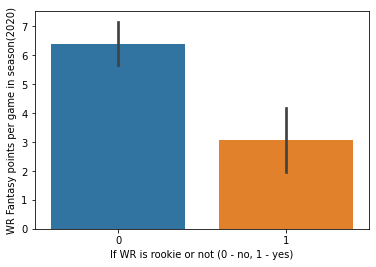

In [129]:
sns.barplot(ff_wr['rookie22'], ff_wr['fp_per_gm22hppr'] )
plt.xlabel('If WR is rookie or not (0 - no, 1 - yes)')
plt.ylabel('WR Fantasy points per game in season(2020)')

<AxesSubplot:>

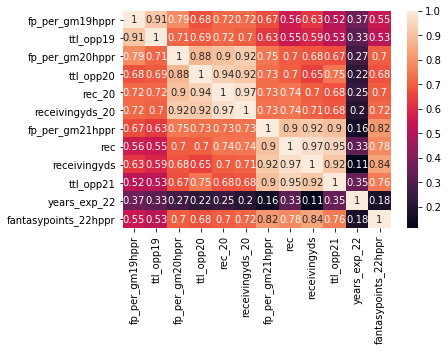

In [136]:
sns.heatmap(ff_wr[['fp_per_gm19hppr', 'ttl_opp19','fp_per_gm20hppr', 'ttl_opp20', 'rec_20', 'receivingyds_20',
                       'fp_per_gm21hppr',  'rec', 'receivingyds', 'ttl_opp21', 'years_exp_22', 'fantasypoints_22hppr']].corr(), annot = True)

### TE

In [135]:
ff_collective.head()

,team,player_name,position,player_id_x,height,weight,years_exp,player,tm,pos,age,g,gs,tgt,rec,passingyds,passingtd,passingatt,rushingyds,rushingtd,rushingatt,receivingyds,receivingtd,fantasypoints,int,fumbles,fumbleslost,season,rookie_year,pts/g,gp,cmp,team_abb,player_id_y,qbr_total,pts_added,qb_plays,epa_total,pass,run,exp_sack,qbr_raw,sack,name_display,player_display_name,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness,max_completed_air_distance,avg_air_yards_to_sticks,attempts,pass_yards,pass_touchdowns,interceptions,passer_rating,completions,completion_percentage,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,efficiency,percent_attempts_gte_eight_defenders,avg_time_to_los,rush_attempts,rush_yards,expected_rush_yards,rush_yards_over_expected,avg_rush_yards,rush_yards_over_expected_per_att,rush_pct_over_expected,rush_touchdowns,avg_cushion,avg_separation,percent_share_of_intended_air_yards,receptions,targets,catch_percentage,yards,rec_touchdowns,avg_yac,avg_expected_yac,avg_yac_above_expectation,home_team,tm.1,1std,totyd,passy,rushy,to,offense,defense,sp. tms,name,abbreviation,pct_gs,avg_per_rush,avg_per_catch,avg_per_tgt,ttl_touch,ttl_opp,ttl_opp_per_game,yds_per_opp,td_per_opp,turnover_per_opp,fp_per_opp,fp_per_gm,fantasypoints_hppr,fp_per_game_hppr
0,ARI,Brett Hundley,QB,00-0031589,75.0,226.0,4.0,Brett Hundley,ARI,QB,26.0,3.0,0.0,0.0,0.0,49.0,0.0,11.0,41.0,0.0,7.0,0.0,0.0,6.06,0.0,0.0,0.0,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arizona Cardinals,22.5625,19.625,341.6875,217.3125,124.375,2.0,4.0225,-10.846875,1.240625,Arizona Cardinals,ARI,0.000000,5.857143,NaN,NaN,7.0,18.0,6.000000,5.000000,0.000000,0.000000,0.336667,2.020000,6.06,2.020000
1,ARI,Kyler Murray,QB,00-0035228,70.0,207.0,0.0,Kyler Murray,ARI,QB,22.0,16.0,16.0,0.0,0.0,3722.0,20.0,542.0,544.0,4.0,93.0,0.0,0.0,279.28,12.0,5.0,2.0,2019,NaN,NaN,NaN,NaN,ARI,3917315.0,57.7,16.2,709.0,71.6,37.3,13.4,0.0,58.0,-17.8,Kyler Murray,Kyler Murray,2.733681,4.914236,6.850385,-1.936149,13.732432,38.64734,-2.111357,63.764706,437.882353,2.352941,1.411765,88.714455,41.058824,65.018637,66.836301,-1.817664,20.623331,45.849949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arizona Cardinals,22.5625,19.625,341.6875,217.3125,124.375,2.0,4.0225,-10.846875,1.240625,Arizona Cardinals,ARI,1.000000,5.849462,NaN,NaN,93.0,635.0,39.687500,6.718110,0.037795,0.026772,0.439811,17.455000,279.28,17.455000
2,ARI,Alfred Morris,RB,00-0029141,70.0,222.0,7.0,Alfred Morris,ARI,RB,31.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.40,0.0,0.0,0.0,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arizona Cardinals,22.5625,19.625,341.6875,217.3125,124.375,2.0,4.0225,-10.846875,1.240625,Arizona Cardinals,ARI,0.000000,4.000000,NaN,NaN,1.0,1.0,1.000000,4.000000,0.000000,0.000000,0.400000,0.400000,0.40,0.400000
3,ARI,David Johnson,RB,00-0032187,73.0,224.0,4.0,David Johnson,ARI,RB,28.0,13.0,9.0,47.0,36.0,0.0,0.0,0.0,345.0,2.0,94.0,370.0,4.0,141.50,0.0,1.0,1.0,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arizona Cardinals,22.5625,19.625,341.6875,217.3125,124.375,2.0,4.0225,-10.846875,1.240625,Arizona Cardinals,ARI,0.692308,3.670213,10.277778,7.872340,130.0,141.0,10.846154,5.070922,0.042553,0.007092,1.003546,10.884615,159.50,12.269231
4,ARI,Kenyan Drake,RB,00-0033118,73.0,211.0,3.0,Kenyan Drake,2TM,RB,25